In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
X_train = pd.read_csv('./X_train.csv')
y_train = pd.read_csv('./y_train.csv')
X_test = pd.read_csv('./X_test.csv')
y_test = pd.read_csv('./y_test.csv')

In [3]:
%store -r class_weight
%store -r X_train_SMOTE
%store -r y_train_SMOTE

In [4]:
X_train = pd.DataFrame(X_train.iloc[:, :-1], columns=X_train.columns[:-1])
X_test = pd.DataFrame(X_test.iloc[:, :-1], columns=X_test.columns[:-1])
y_train = y_train['Tip']
y_test = y_test['Tip']
X_train_SMOTE = pd.DataFrame(X_train_SMOTE.iloc[:, :-1], columns=X_train_SMOTE.columns[:-1])

**Model treniran nad obicnim podacima**

In [21]:
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=4)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_clf = DecisionTreeClassifier(random_state=42, **best_params)
best_clf.fit(X_train, y_train)

y_pred_best = best_clf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

classification_rep = classification_report(y_test, y_pred_best)
feature_importance = best_clf.feature_importances_

print("\nNajbolji parametri:", best_params)
print("Tacnost modela sa najboljim parametrima:", round(accuracy_best, 5))
print("Precision modela sa najboljim parametrima:", round(precision_best, 5))
print("Recall modela sa najboljim parametrima:", round(recall_best, 5))
print("F1 score modela sa najboljim parametrima:", round(f1_best, 5))
#print("\nIzvestaj o klasifikaciji:\n", classification_rep)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.697 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.746 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.793 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.744 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.680 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.738 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.810 total time= 

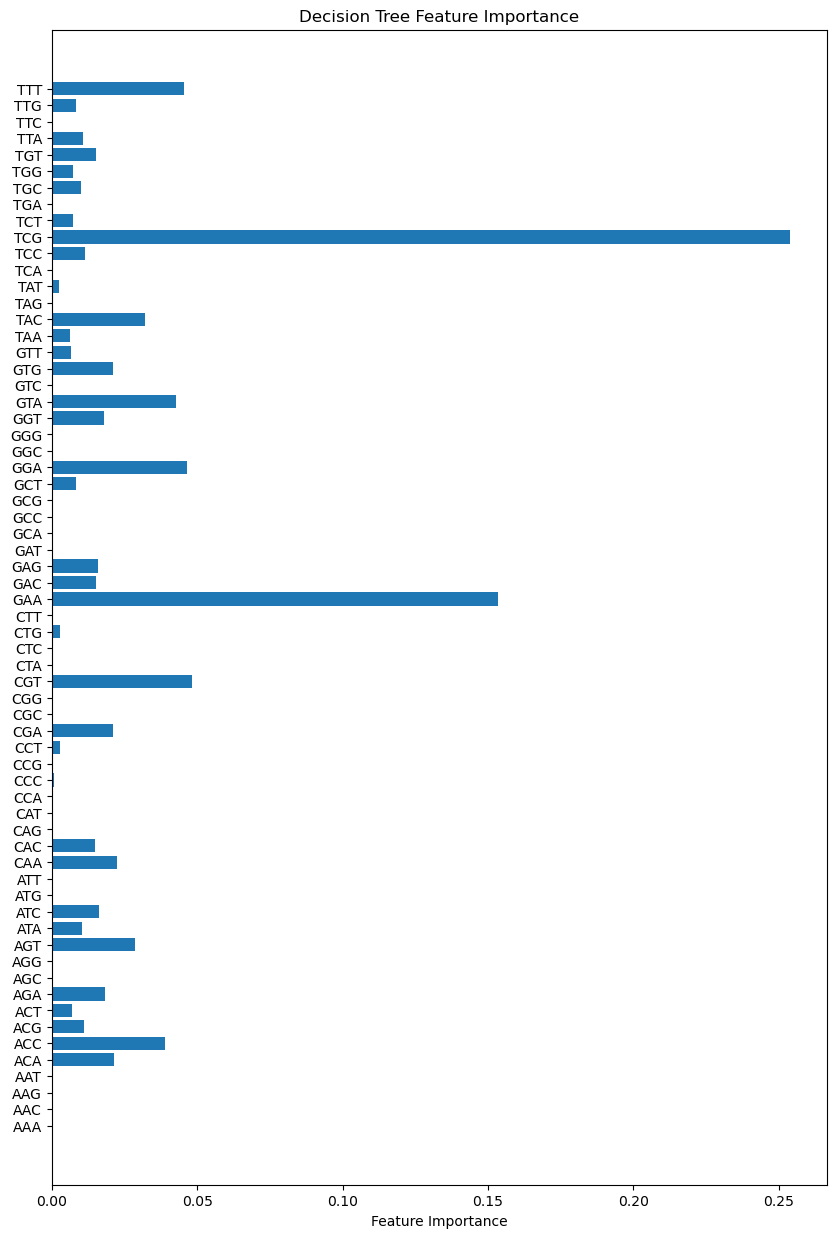

In [22]:
feature_names = X_train.columns
plt.figure(figsize=(10, 15))

plt.barh(range(len(feature_names)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')

plt.show()

**Model treniran nad podacima na kojima je primenjena SMOTE tehnika**

In [23]:
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=4)
grid_search.fit(X_train_SMOTE, y_train_SMOTE)

best_params = grid_search.best_params_

best_clf = DecisionTreeClassifier(random_state=42, **best_params)
best_clf.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_best = best_clf.predict(X_test)
accuracy_best_SMOTE = accuracy_score(y_test, y_pred_best)
precision_best_SMOTE = precision_score(y_test, y_pred_best, average='weighted')
recall_best_SMOTE = recall_score(y_test, y_pred_best, average='weighted')
f1_best_SMOTE = f1_score(y_test, y_pred_best, average='weighted')

classification_rep = classification_report(y_test, y_pred_best)
feature_importance = best_clf.feature_importances_

print("\nNajbolji parametri:", best_params)
print("Tacnost modela sa najboljim parametrima:", round(accuracy_best_SMOTE, 5))
print("Precision modela sa najboljim parametrima:", round(precision_best_SMOTE, 5))
print("Recall modela sa najboljim parametrima:", round(recall_best_SMOTE, 5))
print("F1 score modela sa najboljim parametrima:", round(f1_best_SMOTE, 5))
#print("\nIzvestaj o klasifikaciji:\n", classification_rep)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.831 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.855 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.896 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.902 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.905 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.814 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.858 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.899 total time= 

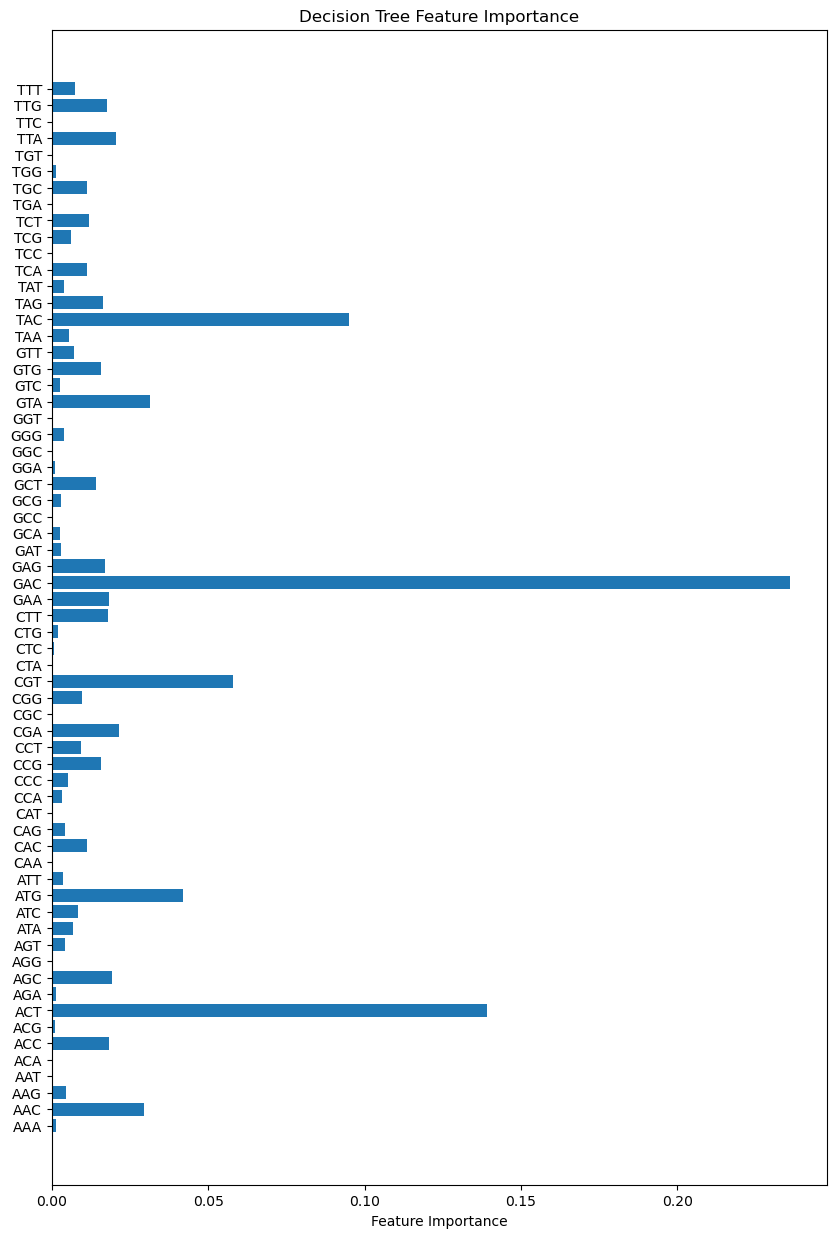

In [24]:
feature_names = X_train_SMOTE.columns
plt.figure(figsize=(10, 15))

plt.barh(range(len(feature_names)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')

plt.show()

**Model treniran nad podacima na koje su primenjene tezine klasa**

In [25]:
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

clf = DecisionTreeClassifier(random_state=42, class_weight=class_weight)

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=4)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_clf = DecisionTreeClassifier(random_state=42, **best_params, class_weight=class_weight)
best_clf.fit(X_train, y_train)

y_pred_best = best_clf.predict(X_test)
accuracy_best_cw = accuracy_score(y_test, y_pred_best)
precision_best_cw = precision_score(y_test, y_pred_best, average='weighted')
recall_best_cw = recall_score(y_test, y_pred_best, average='weighted')
f1_best_cw = f1_score(y_test, y_pred_best, average='weighted')

classification_rep = classification_report(y_test, y_pred_best)
feature_importance = best_clf.feature_importances_

print("\nNajbolji parametri:", best_params)
print("Tacnost modela sa najboljim parametrima:", round(accuracy_best_cw, 5))
print("Precision modela sa najboljim parametrima:", round(precision_best_cw, 5))
print("Recall modela sa najboljim parametrima:", round(recall_best_cw, 5))
print("F1 score modela sa najboljim parametrima:", round(f1_best_cw, 5))
#print("\nIzvestaj o klasifikaciji:\n", classification_rep)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.705 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.785 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.730 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.680 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.785 total time= 

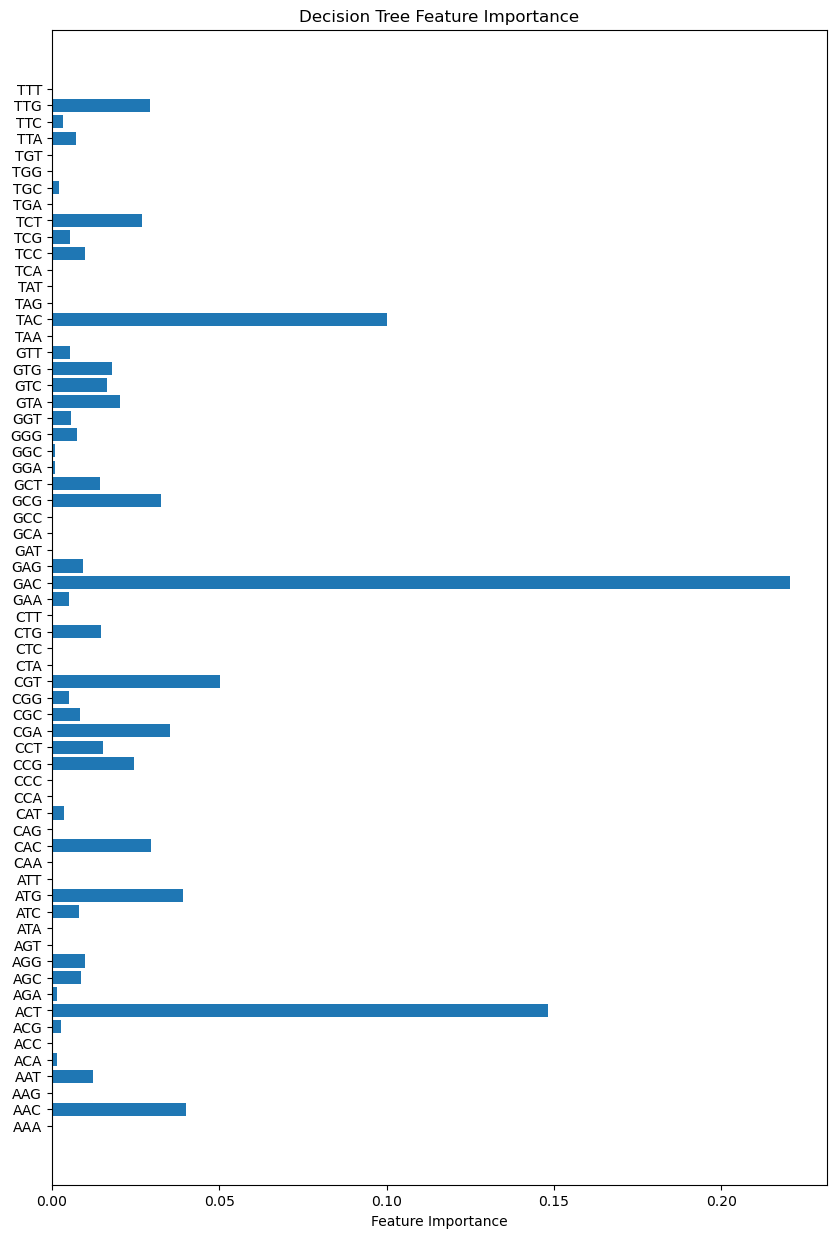

In [26]:
feature_names = X_train.columns
plt.figure(figsize=(10, 15))

plt.barh(range(len(feature_names)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')

plt.show()

**Poredjenje modela**

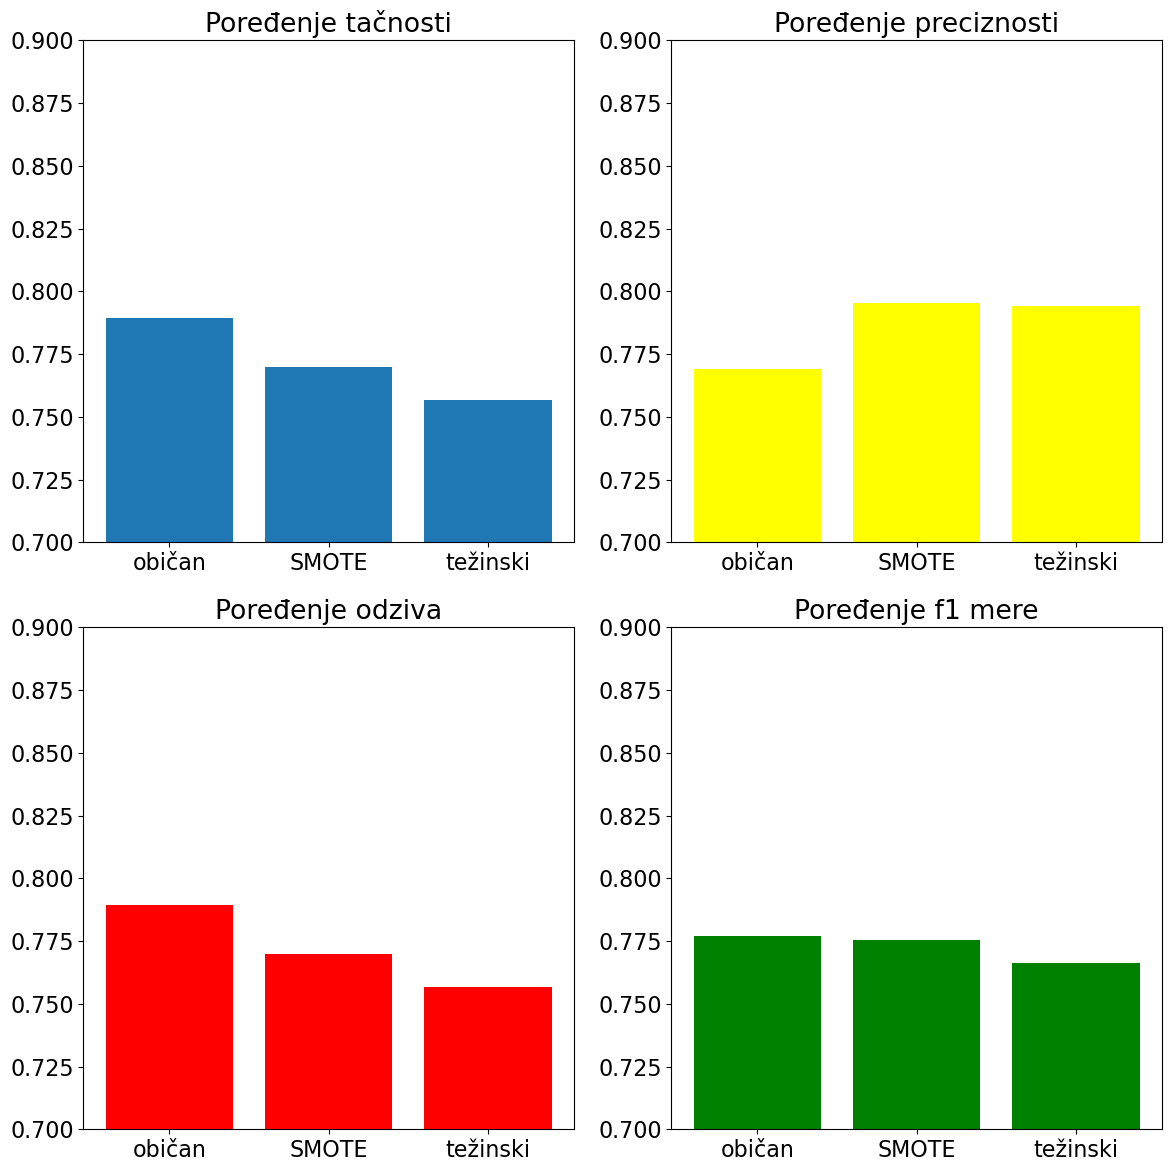

In [33]:
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.bar(['običan', 'SMOTE', 'težinski'], [accuracy_best, accuracy_best_SMOTE, accuracy_best_cw])
plt.title('Poređenje tačnosti')
plt.ylim(0.7, 0.9)

plt.subplot(2, 2, 2)
plt.bar(['običan', 'SMOTE', 'težinski'], [precision_best, precision_best_SMOTE, precision_best_cw], color='yellow')
plt.title('Poređenje preciznosti')
plt.ylim(0.7, 0.9)

plt.subplot(2, 2, 3)
plt.bar(['običan', 'SMOTE', 'težinski'], [recall_best, recall_best_SMOTE, recall_best_cw], color='red')
plt.title('Poređenje odziva')
plt.ylim(0.7, 0.9)

plt.subplot(2, 2, 4)
plt.bar(['običan', 'SMOTE', 'težinski'], [f1_best, f1_best_SMOTE, f1_best_cw], color='green')
plt.title('Poređenje f1 mere')
plt.ylim(0.7, 0.9)

plt.savefig('DTC_poredjenje.png')
plt.tight_layout()
plt.show()

In [31]:
dtc_best_accuracy = accuracy_best

In [32]:
%store dtc_best_accuracy

Stored 'dtc_best_accuracy' (float64)
